**Image Segmentation:**

Image segmentation is the process of partitioning an image into multiple segments or regions based on certain characteristics, such as color, intensity, texture, or other features. In simple terms, it involves dividing an image into meaningful parts or objects by analyzing the individual pixels and grouping them together based on their similarities. This allows for easier analysis and understanding of the image content.

In [19]:
import torch
from torchvision import transforms
from PIL import Image
from torchvision.models.segmentation import deeplabv3_resnet101
from IPython.display import display

In [20]:
# Load the DeepLabV3 model
model = deeplabv3_resnet101(pretrained=True)

In [21]:
# Set the model to evaluation mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [22]:
# Transform the input image
transform = transforms.Compose([transforms.ToTensor(),])

In [23]:
# Load and transform the image
image_path = r"C:\Users\ganig\OneDrive\Desktop\Dataset\group_2.jpg"
image = Image.open(image_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0)

In [24]:
# Perform inference
with torch.no_grad():
    output = model(input_tensor)['out'][0]

In [25]:
# Convert the output to a binary mask
mask = output.argmax(0).cpu().numpy()

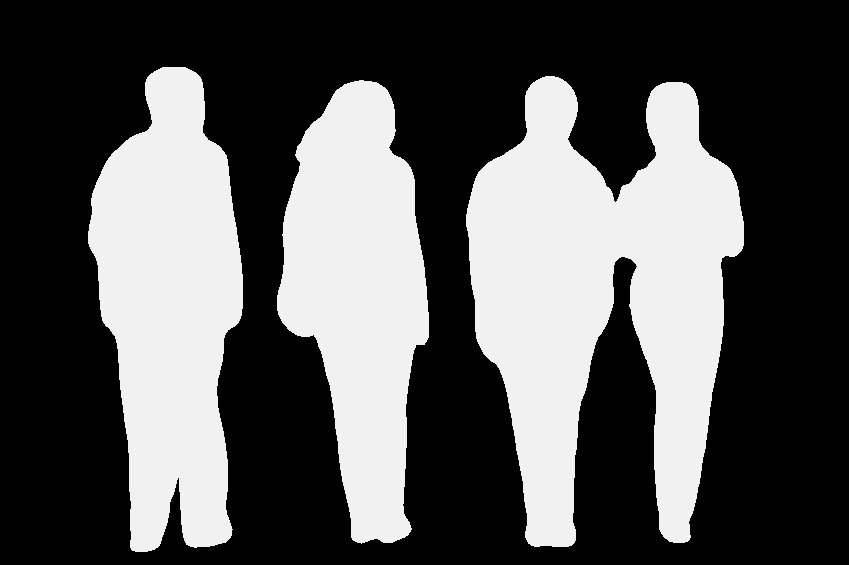

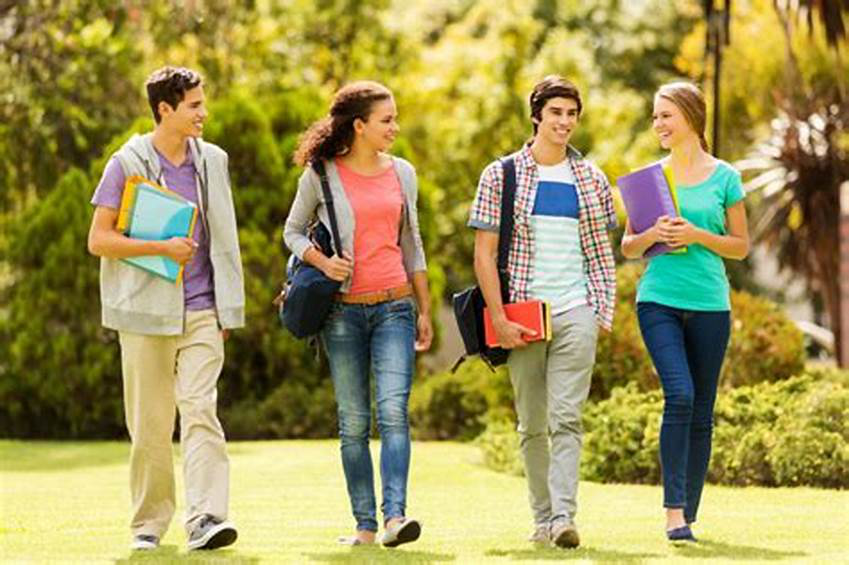

In [26]:
## Display the binary mask
binary_mask = (mask * 255).astype('uint8')
mask_image = Image.fromarray(binary_mask)
display(mask_image)

## Display the original image
display(image)